In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [25]:
num_pts = 20000
fs = 1000
t = np.linspace(0, 2*np.pi, num_pts)
f = 5.5 * np.cos(2*t - np.pi /4) - \
        2.3 * np.cos(10*t) + \
        3.2 * np.cos(25*t - np.pi/6) + \
        1.5 * np.cos(200*t - np.pi/8)  # the signal

f2 = 5.5 * np.cos(2*t - np.pi /4) - \
        2.3 * np.cos(10*t) + \
        3.2 * np.cos(25*t - np.pi/6)

f3 = 5.5 * np.cos(2*t - np.pi /4) - \
        2.3 * np.cos(10*t)

f4 = np.sin(120*t)

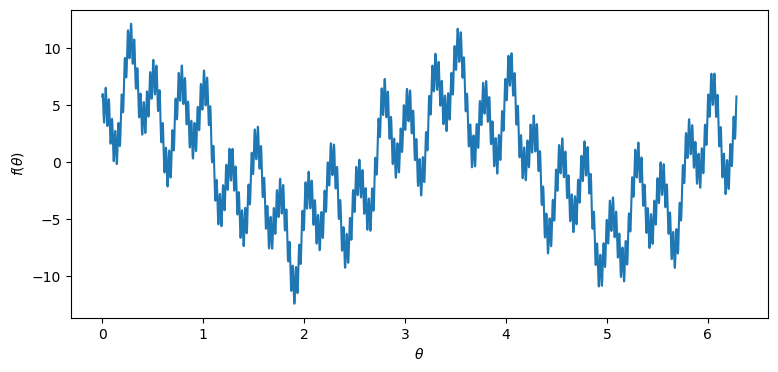

In [30]:
fig = plt.figure(figsize=(9, 4))
#plt.plot(t, f, color='dodgerblue')
#plt.plot(t, f2, 'red')
plt.plot(t,f)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.show()

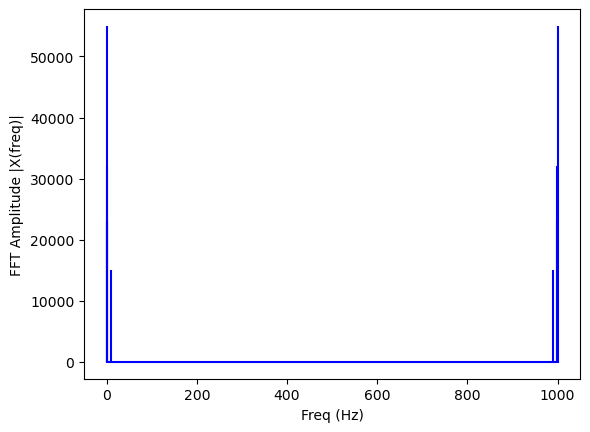

In [31]:
X = np.fft.fft(f)
N = len(X) #20,000
n = np.arange(N) #0-20,000
T = N/fs
freq = n/T
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

20000
999


<BarContainer object of 999 artists>

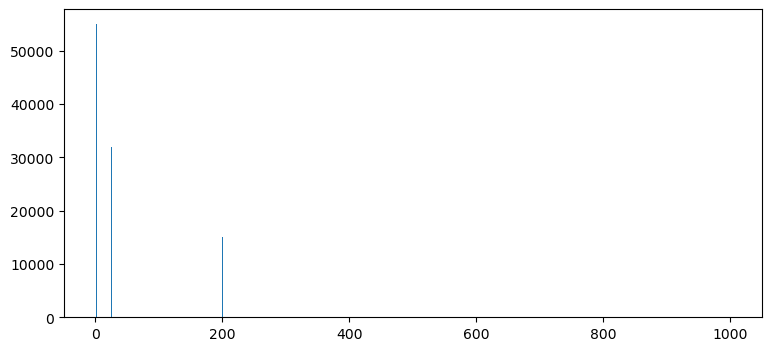

In [32]:
fft_of_sample = np.fft.fft(f)
#2.0 / num_pts * 
fft_amplitudes = np.abs(fft_of_sample)
fft_phases = np.angle(fft_of_sample)
harmonics = np.arange(1, 1000)
print(len(fft_amplitudes))
print(len(harmonics))
fig = plt.figure(figsize=(9, 4))
plt.bar(harmonics, fft_amplitudes[harmonics])

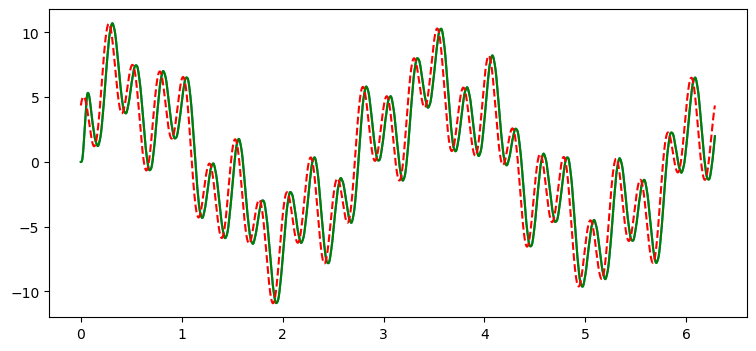

In [33]:
fc = 150
normed = fc / (fs / 2)
sos = signal.butter(N=4, Wn= fc / (40), btype='lowpass', output='sos', fs=1000)
filtered = signal.sosfilt(sos,f)
fig = plt.figure(figsize=(9, 4))
plt.plot(t, filtered)
#plt.plot(t,f,'--',color='blue')
plt.plot(t,filtered,color='green')
#fig = plt.figure(figsize=(9, 4))
#plt.plot(t,filtered,color='dodgerblue')
plt.plot(t,f2,'--',color='red')


<BarContainer object of 249 artists>

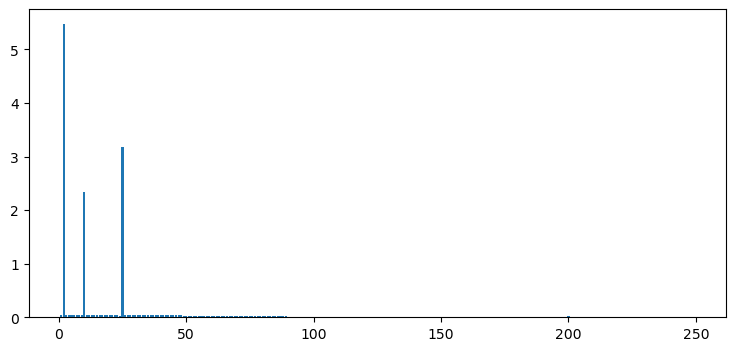

In [34]:
f_fft_of_sample = np.fft.fft(filtered)
f_fft_amplitudes = 2.0 / num_pts * np.abs(f_fft_of_sample)
f_fft_phases = np.angle(f_fft_of_sample)
filtered_harmonics = np.arange(1, 250)
fig = plt.figure(figsize=(9, 4))
plt.bar(filtered_harmonics, f_fft_amplitudes[filtered_harmonics])

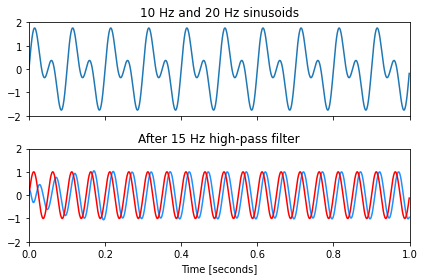

In [164]:
#Note: this is just a snippet of example code that implements a butterworth filter on the data specified.
#This is incompatible with the previous sections of code!!

t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
f3 = np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])


sos = signal.butter(10, 15, 'hp', fs=1000, analog = False, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered, color='dodgerblue')
ax2.plot(t,f3,color='red')
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()